### 相关api
- matplotlib.gridspec.GridSpec():创建和配置复杂的子图网格布局,以便在一个图形窗口放在多个子图
- matplotlib.gridspec.SubplotSpec:定义和控制子图字网格布局中的位置和大小
- matplotlib.pyplot.countour():等高线
- matplotlib.pyplot.countourf():等高线填充
- matplotlib.pyplot.scatter():散点图
- matplotlib.pyplot.figure():创建一个新的图形窗口或图表对象,以便在其上进行绘图操作
- matplotlib.pyplot.rcParams:获取或设置全局绘图参数的默认值,图形尺寸,字体大小,线条样式
- matplotlib.pyplot.subplot():用于当前图形窗口中创建一个子图,并定位该子图在整个图形窗口中的位置
- matplotlib.pyplot.subplots():一次性创建一个包含多个子图的图形窗口,并返回一个包含子图对象的元组
   
- numpy.random.multivariate_normal():用于生成多元正态分布的随机样本
- scipy.stats.gaussian_kde():高斯密度估计
- statsmodels.api.nonparametric.KDEUnivariate():构造一元KDE

In [2]:
import matplotlib.pyplot as plt
from  matplotlib.gridspec import GridSpec


### 图像对象
- 大小:
    默认尺寸宽6.4英尺,高4.8英尺(1英尺=2.54厘米),可以使用figure参数来设置宽度和高度figure(figsize=(宽度,高度))英尺

- 分辨率dpi(dot per inch):
    可以利用plt.rcParams['figure.dpi']=300来调整分辨率
    > plt.rcParams存放着全局参数

- 边距:
    图片中上下左右的留白,就是边距(margin).参数是0-1的浮点数,相当于图像宽度高度的百分比
    > figure.subplot.left;
    > figure.subplot.right;
    > figure.subplot.top;
    > figure.subplot.bottom
    



In [5]:
print(plt.rcParams['figure.dpi'])
print(plt.rcParams['figure.subplot.left'])
print(plt.rcParams['figure.subplot.right'])
print(plt.rcParams['figure.subplot.top'])
print(plt.rcParams['figure.subplot.bottom'])
plt.rcParams['figure.dpi']=300
fig=plt.figure(figsize=(2,2))
# adjust 调整
fig.subplots_adjust(left=0.5,top=1)

300.0
0.125
0.9
0.88
0.11


/var/folders/m4/fgyn19bn1cb4vzrvd9hbd2xr0000gn/T/ipykernel_1026/2842733791.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 600x600 with 0 Axes>

### subplot
该函数用来管理和创建子图,语法subplot(nrow,ncol,index),nrow行数,ncol列数,index索引

#### plt.plot vs ax.plot
plt.plot相当于提笔就画,matplotlib的pyplot接口中的函数,它时一种简单快速的方式绘图.会自动创建一个图形窗口并在该窗口中绘图,如果统一个窗口绘制多个图形可以用这个

ax.plot基于Axes对象来绘图,Axes是一个图形窗口中独立坐标系,需要用Figure对象显示创建一个或者多个Axes对象,并指定在该对象上绘图

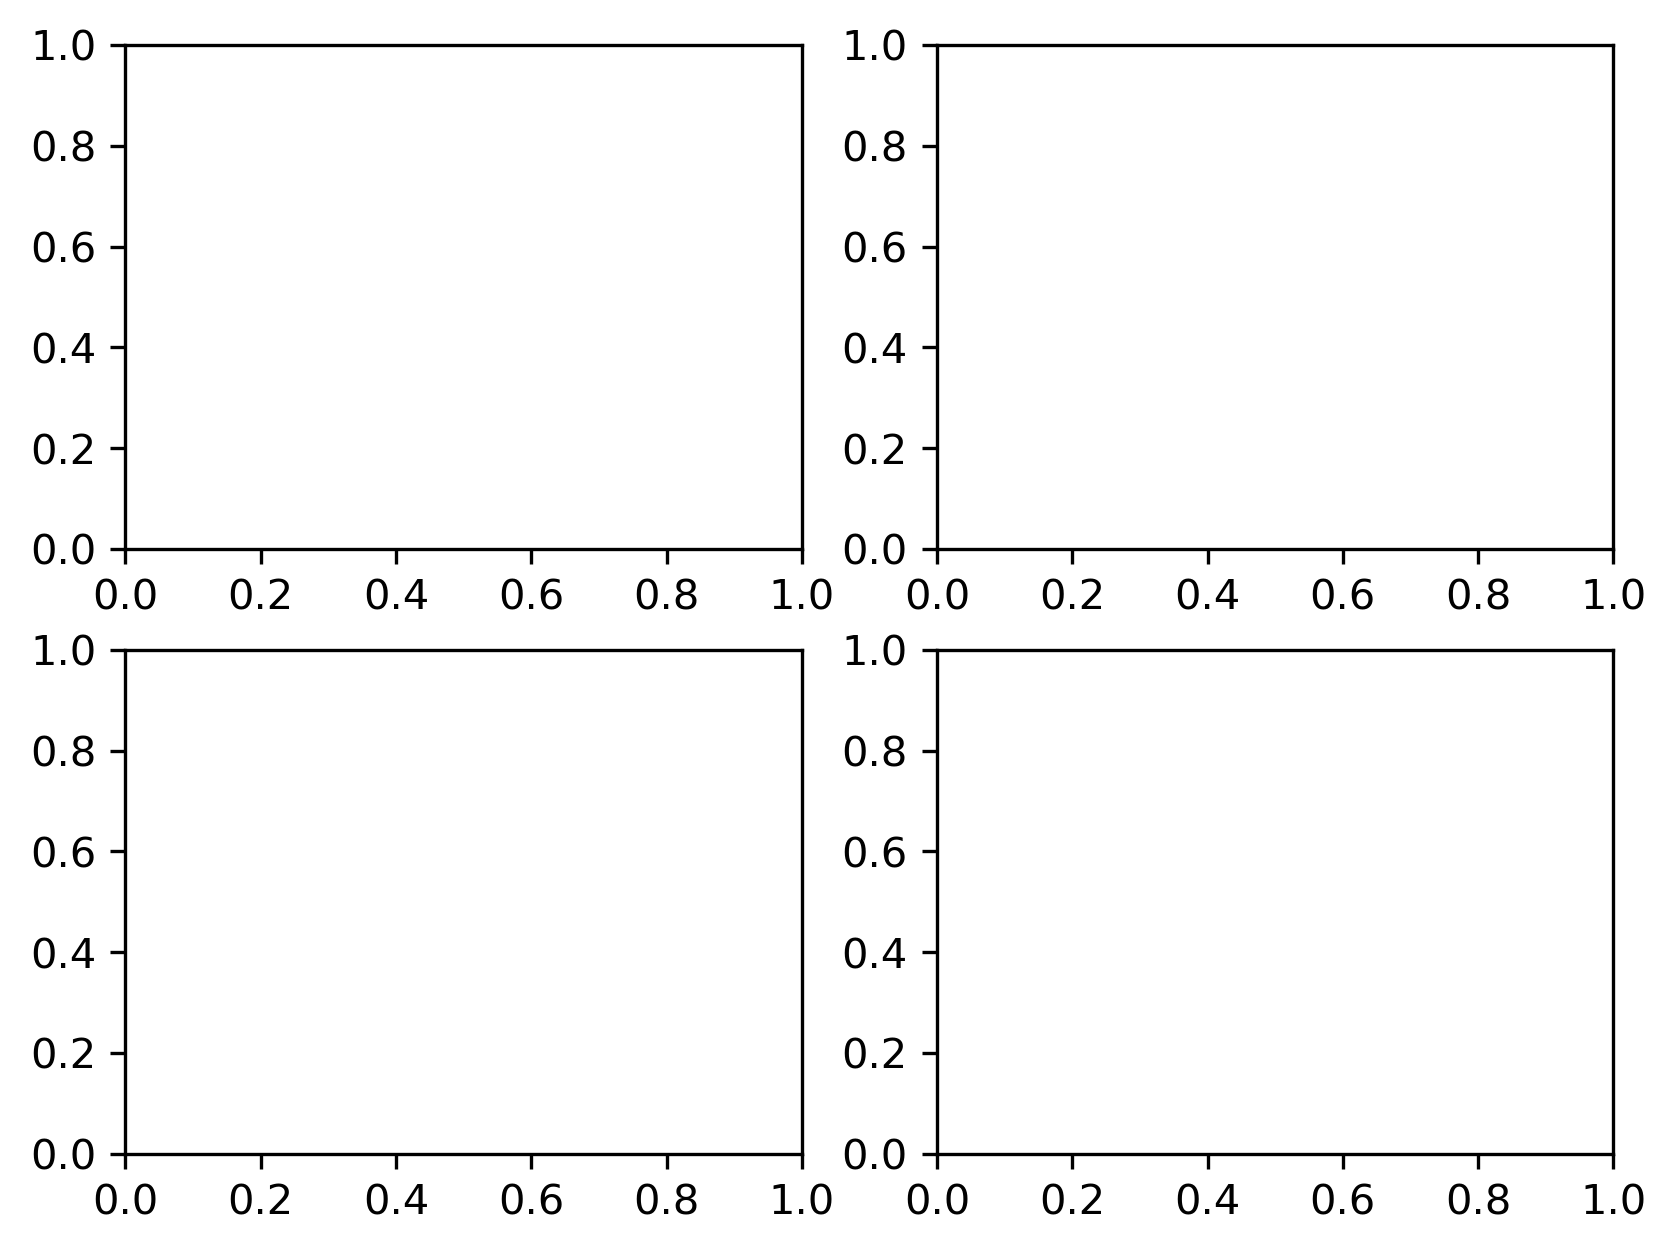

In [7]:
ax1=plt.subplot(2,2,1)
ax2=plt.subplot(2,2,2)
ax3=plt.subplot(2,2,3)
ax4=plt.subplot(2,2,4)

### add_subplot
add_subplot函数在图像中添加子图,基本语法fig=plt.figure()产生出Figure对象,在它上面调用fig.add_subplot()它会返回一个AxesSubplot对象,表示创建的子图

> 还可以用insert_axes和add_axes在指定位置插入特定宽高图形,位置,宽度,高的数值均为0和1之间的浮点数,代表百分比

### subplots
subplots函数用于创建一个包含多个子图的图形布局,并返回一个图形元组

1. fig,axes=plt.subplots(nrows,ncols)为整数分别代表行和列
2. axes[i,j]表示i行和j列的位置上子图对象

> gridspec_kw={'witght_ratios':[3,1],'height_ratios':[1,3]} 设置比例

### GridSpec
GridSpec是一个用于灵活布局子图工具,允许在绘图区域中创建规则的网格,并指定每个子图的大小,位置和跨越的行列数

#### 使用方式
1. 创建一个fig对象
2. gs=fig.add_gridspec(nrows,ncols)
3. gs[i,j]表示在i行和j列位置创建的子图

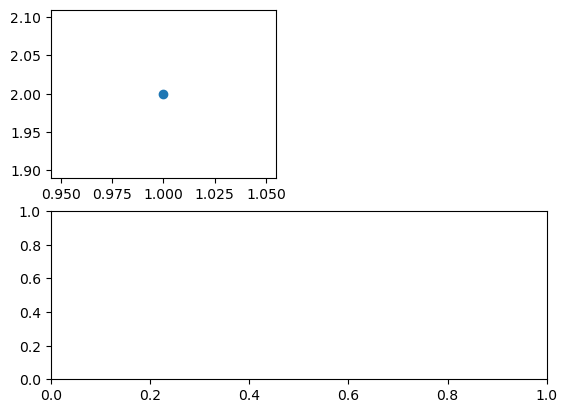

In [3]:


fig=plt.figure()
grids=fig.add_gridspec(2,2)


ax=fig.add_subplot(grids[1,:,])
ax=fig.add_subplot(grids[0,:1,])
ax.scatter(1,2)


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols,lambdify,exp,diff

In [3]:
# 全局参数
p=plt.rcParams

p['figure.dpi']=300
p['figure.weight']='light'
p['ytick.minor.visible']=False
p['xtick.minor.visible']=False
p['axes.grid']=True

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
   

In [6]:
# 定义函数
x,y=symbols('x,y')
f=exp(-x**2)
f_fcn=lambdify(x,f)

x_arr=np.linspace(-3,3,100)
f_arr=f_fcn(x_arr)

df_dx=diff(f,x)
df_dx_fcn=lambdify(x,df_dx)
df_dx_arr=df_dx_fcn(x_arr)

### 图片大小

(0.0, 1.2)

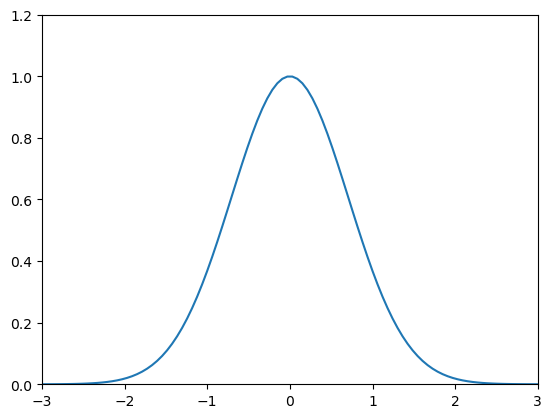

In [7]:
# 一元函数
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(x_arr,f_arr)
ax.set_xlim(-3,3)
ax.set_ylim(0,1.2)

(0.0, 1.2)

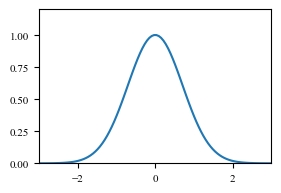

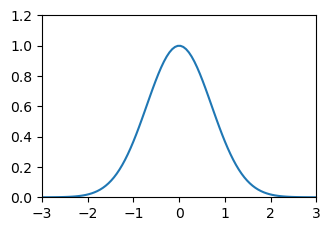

In [10]:
# 图片大小 宽:3 inches 高:2 inches
fig=plt.figure(figsize=(3,2))
ax=fig.add_subplot(1,1,1)

ax.plot(x_arr,f_arr)
ax.set_xlim(-3,3)
ax.set_ylim(0,1.2)
# 字体名字 字体大小
plt.xticks(fontname='Times New Roman')
plt.xticks(fontsize='8')
plt.yticks(fontname='Times New Roman')
plt.yticks(fontsize='8')

# 将英尺转成cm
cm=1/2.54
fig=plt.figure(figsize=(9*cm,6*cm))


ax=fig.add_subplot(1,1,1)

ax.plot(x_arr,f_arr)
ax.set_xlim(-3,3)
ax.set_ylim(0,1.2)

### 调整边距

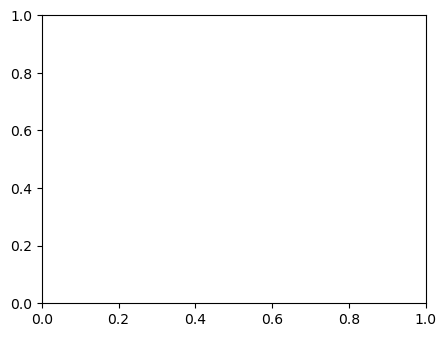

In [20]:
fig,ax=plt.subplots()

# 调整边距
fig.subplots_adjust(left=0.2,right=0.8,bottom=0.2,top=0.8)

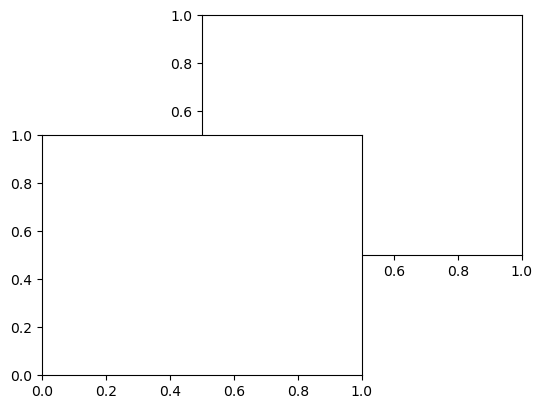

In [28]:
# 轴对象位置
fig=plt.figure()

fig.add_axes((0.5,0.5,0.5,0.5))

fig.add_axes((0.25,0.25,0.5,0.5))
plt.show()

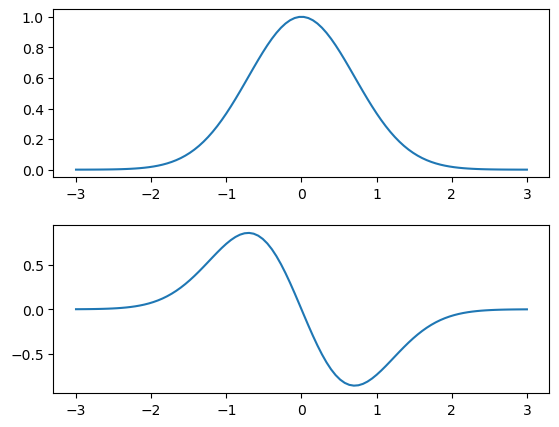

In [33]:
fig=plt.figure()
# add_axes()坐标
ax1=fig.add_axes((0.125,0.11+0.45,.775,.35))
ax1.plot(x_arr,f_arr)
ax2=fig.add_axes((0.125,0.11,.775,.35))
ax2.plot(x_arr,df_dx_arr)

(0.0, 1.2)

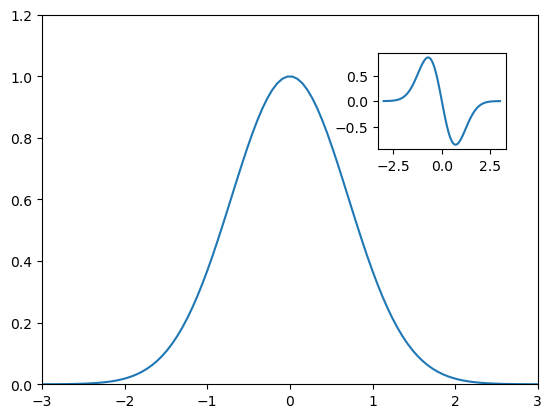

In [40]:
# 图中图
fig,ax=plt.subplots()

c_ax=fig.add_axes((0.65,0.6,0.2,0.2))
c_ax.plot(x_arr,df_dx_arr)

ax.plot(x_arr,f_arr)
ax.set_xlim(-3,3)
ax.set_ylim(0,1.2)
